In [285]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import patsy

In [150]:
with open('PLmatches.csv', 'r') as open_file:
    df = pd.read_csv(open_file, index_col=0)

In [333]:
for stadium in df['match_stadium'].unique():
    df2 = df[df['match_stadium'] == stadium].loc[:,['mean_attendance_delta_normalized', 'home_prior_leaguerank', 'away_prior_leaguerank',
            'home_last3_goals', 'home_last3_poss', 'away_last3_poss', 'away_distance', 'season_num', 'att_std', 'match_attendance', 'stupid_model']]
    df2.dropna(how='any', inplace=True)
    y = df2['mean_attendance_delta_normalized']
    if len(df2) < 10:
        continue
    X = df2.iloc[:,1:7]
    scaler = StandardScaler()
    scaler.fit(X)
    X_scaled = scaler.transform(X)
    model = sm.OLS(y, X_scaled)
    res = model.fit()
    ypred = res.predict(X_scaled)
    df2['better_model'] = df2['stupid_model'] + np.multiply(ypred, df2['att_std'])
    df['better_model'] = df.apply(add_better_model, axis=1)

In [324]:
df2.dropna(how='any', inplace=True)

In [326]:
y = df2['mean_attendance_delta_normalized']
X = df2.iloc[:,1:7]

In [327]:
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [328]:
model = sm.OLS(y, X_scaled)

In [329]:
res = model.fit()

In [330]:
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     mean_attendance_delta_normalized   R-squared:                       0.219
Model:                                          OLS   Adj. R-squared:                  0.184
Method:                               Least Squares   F-statistic:                     6.319
Date:                              Fri, 20 Jul 2018   Prob (F-statistic):           1.50e-06
Time:                                      11:32:11   Log-Likelihood:                -214.31
No. Observations:                               165   AIC:                             442.6
Df Residuals:                                   158   BIC:                             464.4
Df Model:                                         7                                         
Covariance Type:                          nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.0480      0.075     -0.639      0.523      -0.196       0.100
x2            -0.3177      0.079     -4.019      0.000      -0.474      -0.162
x3             0.1921      0.075      2.572      0.011       0.045       0.340
x4             0.0479      0.071      0.671      0.503      -0.093       0.189
x5             0.0207      0.079      0.263      0.793      -0.135       0.176
x6            -0.2449      0.072     -3.417      0.001      -0.386      -0.103
x7             0.0475      0.072      0.659      0.511      -0.095       0.190
==============================================================================
Omnibus:                        4.153   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.125   Jarque-Bera (JB):                3.981
Skew:                          -0.380   Prob(JB):                        0.137
Kurtosis:                       3.013   Cond. No.                         1.65
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [271]:
ypred = res.predict(X_scaled)

In [272]:
ytest = df2.iloc[:,0]

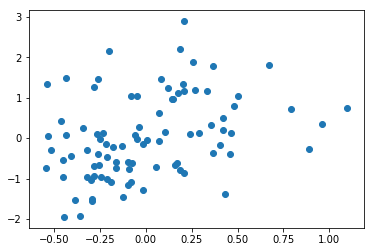

In [273]:
plt.scatter(ypred, ytest)

plt.scatter(np.multiply(ypred, df2[df2['season_num'] > 10]['att_std']) + df2[df2['season_num'] > 10]['stupid_model'], df2[df2['season_num'] > 10]['match_attendance'])
plt.scatter(df2[df2['season_num'] > 10]['stupid_model'], df2[df2['season_num'] > 10]['match_attendance'])
plt.plot(np.arange(0,40000))

df3 = df2[df2['season_num'] > 10]

df3.dropna(subset=['stupid_model'], inplace=True)


In [274]:
df2['better_model'] = df2['stupid_model'] + np.multiply(ypred, df2['att_std'])

model = sm.OLS(df3['match_attendance'], df3['better_model'])
res = model.fit()
res.summary()

sum((df3['match_attendance']-df3['better_model'])**2)

sum((df3['match_attendance']-df3['stupid_model'])**2)

In [275]:
def add_better_model(row):
    if row['better_model'] > 0:
        return row['better_model']
    if row.name in df2.index:
        return df2.loc[row.name, 'better_model']
    else:
        return np.nan

In [276]:
df['better_model'] = df.apply(add_better_model, axis=1)

In [277]:
df[df['better_model'] > 0]

,hometeam_name,awayteam_name,home_goals,away_goals,match_date,match_timestamp,match_referee,match_stadium,match_attendance,home_possession,...,precip_prob,temp_high,week_power,home_last3_leaguepts,away_last3_leaguepts,home_leaguepts_gained,away_leaguepts_gained,att_std,stupid_model,better_model
5592,Aston Villa,Newcastle United,2,0,Sun 27 Aug 2006,1156683600000,Howard Webb,"Villa Park, Birmingham",35141.0,45.2,...,NaN,NaN,8,2.000000,3.000000,3,0,4867.785831,37329.000000,38308.379096
5598,Everton,Liverpool,3,0,Sat 9 Sep 2006,1157802300000,Graham Poll,"Goodison Park, Liverpool",40004.0,43.2,...,NaN,NaN,7,2.333333,2.000000,3,0,2227.370708,39691.000000,41310.216632
5607,Everton,Wigan Athletic,2,2,Sat 16 Sep 2006,1158415200000,Alan Wiley,"Goodison Park, Liverpool",37117.0,60.2,...,NaN,NaN,6,2.333333,1.000000,1,1,2227.370708,39847.500000,40795.387953
5617,Aston Villa,Charlton Athletic,2,0,Sat 23 Sep 2006,1159020000000,Mike Riley,"Villa Park, Birmingham",35513.0,57.7,...,NaN,NaN,5,1.666667,1.000000,3,0,4867.785831,36235.000000,34954.576988
5623,Wigan Athletic,Watford,1,1,Sat 23 Sep 2006,1159020000000,Rob Styles,"DW Stadium, Wigan",17111.0,51.2,...,NaN,NaN,5,1.333333,0.333333,1,1,2901.114967,14834.000000,14216.428587
5629,Everton,Manchester City,1,1,Sat 30 Sep 2006,1159624800000,Andre Marriner,"Goodison Park, Liverpool",38250.0,52.1,...,NaN,NaN,4,1.666667,1.000000,1,1,2227.370708,38937.333333,39832.952602
5637,Aston Villa,Tottenham Hotspur,1,1,Sat 14 Oct 2006,1160834400000,Martin Atkinson,"Villa Park, Birmingham",42551.0,54.1,...,NaN,NaN,3,1.666667,1.333333,1,1,4867.785831,35994.333333,35901.055433
5643,Wigan Athletic,Manchester United,1,3,Sat 14 Oct 2006,1160826300000,Steve Bennett,"DW Stadium, Wigan",20726.0,39.3,...,NaN,NaN,3,0.666667,1.333333,0,3,2901.114967,15972.500000,17363.223994
5646,Aston Villa,Fulham,1,1,Sat 21 Oct 2006,1161447300000,Chris Foy,"Villa Park, Birmingham",30919.0,57.0,...,NaN,NaN,2,1.666667,1.333333,1,1,4867.785831,37633.500000,38332.054248
5649,Everton,Sheffield United,2,0,Sat 21 Oct 2006,1161439200000,Dermot Gallagher,"Goodison Park, Liverpool",37900.0,51.3,...,NaN,NaN,2,0.666667,1.333333,3,0,2227.370708,38765.500000,38279.472161


In [278]:
df4 = df[df['better_model'] > 0]

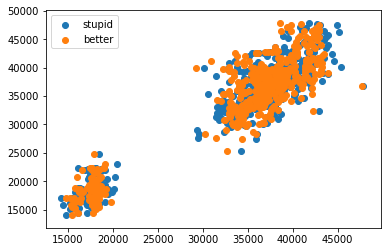

In [281]:
plt.scatter(df4['better_model'], df4['match_attendance'], label = 'stupid')
plt.scatter(df4['stupid_model'], df4['match_attendance'], label = 'better')
plt.legend()

In [282]:
newmodel = sm.OLS(df4['match_attendance'], df4['better_model'])
oldmodel = sm.OLS(df4['match_attendance'], df4['stupid_model'])

In [283]:
newres = newmodel.fit()
newres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       match_attendance   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 7.997e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:45:03   Log-Likelihood:                -4942.1
No. Observations:                 527   AIC:                             9886.
Df Residuals:                     526   BIC:                             9891.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
better_model     1.0000      0.004    282.797      0.000       0.993       1.007
==============================================================================
Omnibus:                       14.145   Durbin-Watson:                   1.829
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               27.712
Skew:                          -0.067   Prob(JB):                     9.60e-07
Kurtosis:                       4.115   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [284]:
oldres = oldmodel.fit()
oldres.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       match_attendance   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                 6.978e+04
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        10:45:20   Log-Likelihood:                -4977.8
No. Observations:                 527   AIC:                             9958.
Df Residuals:                     526   BIC:                             9962.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
stupid_model     1.0001      0.004    264.153      0.000       0.993       1.008
==============================================================================
Omnibus:                       13.165   Durbin-Watson:                   1.853
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.063
Skew:                           0.232   Prob(JB):                     0.000120
Kurtosis:                       3.779   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [321]:
df.head().iloc[:,:10]

,hometeam_name,awayteam_name,home_goals,away_goals,match_date,match_timestamp,match_referee,match_stadium,match_attendance,home_possession
5567,Arsenal,Aston Villa,1,1,Sat 19 Aug 2006,1155996000000,Graham Poll,"Emirates Stadium, London",60023.0,72.9
5568,Bolton Wanderers,Tottenham Hotspur,2,0,Sat 19 Aug 2006,1156004100000,Phil Dowd,"Macron Stadium, Bolton",22899.0,37.8
5569,Everton,Watford,2,1,Sat 19 Aug 2006,1155996000000,Peter Walton,"Goodison Park, Liverpool",39691.0,47.0
5570,Newcastle United,Wigan Athletic,2,1,Sat 19 Aug 2006,1155996000000,Martin Atkinson,"Sports Direct Arena, Newcastle",52227.0,55.3
5571,Portsmouth,Blackburn Rovers,3,0,Sat 19 Aug 2006,1155996000000,Alan Wiley,"Fratton Park, Portsmouth",19502.0,44.3


In [343]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3518 entries, 5585 to 22721
Data columns (total 71 columns):
hometeam_name                       3518 non-null object
awayteam_name                       3518 non-null object
home_goals                          3518 non-null int64
away_goals                          3518 non-null int64
match_date                          3518 non-null object
match_timestamp                     3518 non-null int64
match_referee                       3518 non-null object
match_stadium                       3518 non-null object
match_attendance                    3518 non-null float64
home_possession                     3518 non-null float64
away_possession                     3518 non-null float64
home_shotsontarget                  3518 non-null int64
away_shotsontarget                  3518 non-null int64
home_shots                          3518 non-null int64
away_shots                          3518 non-null int64
home_touches                        35

In [335]:
with open('PLmatches.csv', 'w') as open_file:
    df.to_csv(open_file)

In [337]:
import seaborn as sns

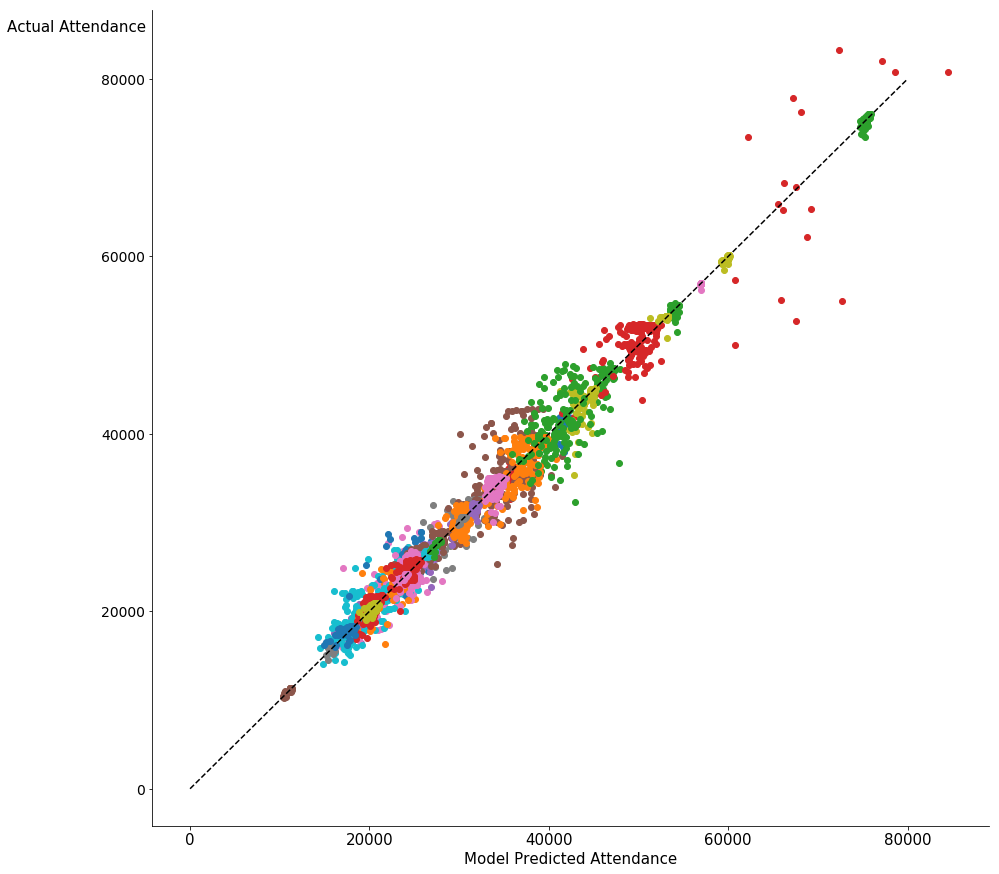

In [348]:
fig, ax = plt.subplots(1,1,figsize=[15,15])
ax.plot(np.arange(1,80000),np.arange(1,80000), color='black', ls='dashed')
for team in df['hometeam_name'].unique():
    ax.scatter(df[df['hometeam_name']==team]['better_model'], df[df['hometeam_name']==team]['match_attendance'], label=team)

sns.despine()
plt.xticks(np.arange(0,100000, 20000), size = 15)
plt.yticks(np.arange(0,100000, 20000), size = 14)
plt.ylabel('Actual Attendance', rotation=0, size = 15)
plt.xlabel('Model Predicted Attendance', size = 15)
ax.yaxis.set_label_coords(-0.09, 0.97)
plt.savefig('testfig.png')

In [346]:
df2 = df.dropna(subset=['better_model'])
model = sm.OLS(df2['match_attendance'], df2['better_model'])

In [347]:
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       match_attendance   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 2.017e+06
Date:                Fri, 20 Jul 2018   Prob (F-statistic):               0.00
Time:                        11:39:08   Log-Likelihood:                -30983.
No. Observations:                3518   AIC:                         6.197e+04
Df Residuals:                    3517   BIC:                         6.197e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
better_model     1.0015      0.001   1420.117      0.000       1.000       1.003
==============================================================================
Omnibus:                      894.818   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            31102.863
Skew:                          -0.514   Prob(JB):                         0.00
Kurtosis:                      17.530   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [349]:
np.mean(df['better_model']-df['match_attendance'])

-108.98033677931828

In [350]:
np.mean(df['stupid_model']-df['match_attendance'])

-109.95820507805753

In [351]:
df3 = df[df['match_stadium'] == 'Stadium of Light, Sunderland']

In [353]:
np.mean(df3['better_model'] - df3['match_attendance'])

-44.381031600647304

In [354]:
np.mean(df3['stupid_model'] - df3['match_attendance'])

-61.83861190191101

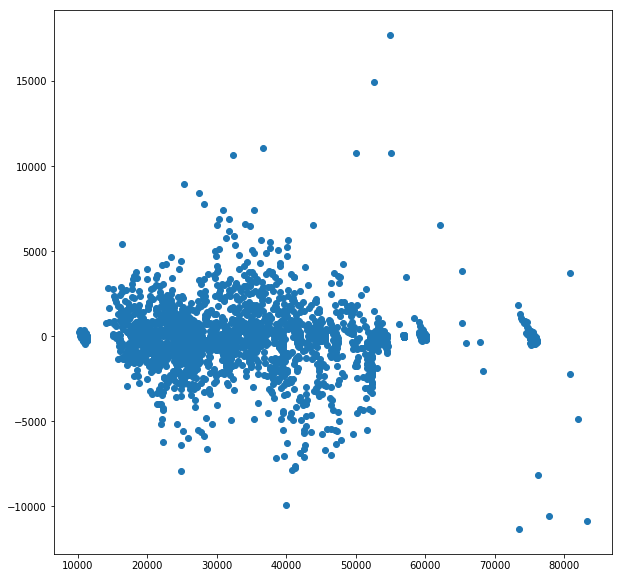

In [361]:
plt.figure(figsize=[10,10])
plt.scatter(df['match_attendance'] ,df['better_model'] - df['match_attendance'])